<a id='xr'></a>  
# Xarray

Xarray provides two main data structures:
- DataArrays that wrap underlying data containers (e.g. numpy arrays) and contain associated metadata
- DataSets that are dictionary-like containers of DataArrays

Xarray has some high level objects that let you do common computations:

1. groupby : Bin data in to groups and reduce
2. resample : Groupby specialized for time axes. Either downsample or upsample your data.
3. rolling : Operate on rolling windows of your data e.g. running mean
4. coarsen : Downsample your data
5. weighted : Weight your data before reducing

[data structures](#xr-structures)  
[import](#xr-import)  
[explore](#xr-explore)  
[coarsen](#xr-coarsen)  
[transform](#xr-transform)  
[select](#xr-select)  
[export](#xr-export)  

## libraries

In [1]:
import os
import numpy as np
import pandas as pd
import xarray as xr
import cartopy.crs as ccrs

In [2]:
import warnings # to ignore warnings
from functools import partial # for shorter traceback error messages
from IPython.core.interactiveshell import InteractiveShell # to automtically show cell output

### parameters

In [3]:
# ignore warnings 
warnings.filterwarnings('ignore')

In [4]:
# shorter traceback error messages
get_ipython().showtraceback = partial(get_ipython().showtraceback,exception_only=True)

In [5]:
# shows result of cell without needing print
InteractiveShell.ast_node_interactivity = "last_expr_or_assign"

## directories

In [6]:
project_id = 'gta'
#project_id = 'ea'

'gta'

In [7]:
home_dir = os.path.expanduser("~")
project_dir = os.path.join(home_dir, project_id)
data_dir = os.path.join(project_dir, 'data')
transformed_data_dir = os.path.join(data_dir, 'transformed-data')

'/Users/rkforest/gta/data/transformed-data'

In [8]:
if project_id == 'ea':
    raw_data_dir = os.path.join(home_dir,'earth-analytics','data','earthpy-downloads')
else:
    raw_data_dir = os.path.join(project_dir, data_dir, 'raw-data')
raw_data_dir

'/Users/rkforest/gta/data/raw-data'

In [9]:
def create_directory(directory_name):
    if not os.path.exists(directory_name):
        print('Created new directory: ', directory_name)
        os.mkdir(directory_name)

In [10]:
create_directory(transformed_data_dir)

In [11]:
os.chdir(project_dir)
os.getcwd()

'/Users/rkforest/gta'

<a id='xr-structures'></a>
## data structures

[Return to Start of Notebook](#xr)  

- **xarray** has two fundamental data structures:
  - a **Dataset**, which can hold multiple DataArrays that potentially share the same coordinates  
  - a **DataArray**, which holds a single multi-dimensional variable and its coordinates

A **Dataset** has four key properties:

- **Dimensions**: dictionary of dimension names and lengths
- **Coordinates**: for each dimension, an array that contains the labels for data points in Data Variables
- **Data Variables**: for each variable, variable name, associated dimensions, and values
- **Attributes**: metadata

A **DataArray** has four essential attributes:
- **Dimensions**: dimension names
- **Coordinates**: for each dimension, an array that contains the labels for each value
- **Values**:  a numpy.ndarray containing the values
- **Attributes**: metadata

<a id='xr-import'></a>
## import

[Return to Start of Notebook](#xr)  

In [12]:
file_name = "gistemp1200_GHCNv4_ERSSTv5.nc"
file_path = os.path.join(raw_data_dir, file_name )

'/Users/rkforest/gta/data/raw-data/gistemp1200_GHCNv4_ERSSTv5.nc'

In [13]:
ds = xr.open_dataset(file_path)
type(ds)

xarray.core.dataset.Dataset

In [14]:
ds

<xarray.Dataset>
Dimensions:      (lat: 90, lon: 180, time: 1719, nv: 2)
Coordinates:
  * lat          (lat) float32 -89.0 -87.0 -85.0 -83.0 ... 83.0 85.0 87.0 89.0
  * lon          (lon) float32 -179.0 -177.0 -175.0 -173.0 ... 175.0 177.0 179.0
  * time         (time) datetime64[ns] 1880-01-15 1880-02-15 ... 2023-03-15
Dimensions without coordinates: nv
Data variables:
    time_bnds    (time, nv) datetime64[ns] ...
    tempanomaly  (time, lat, lon) float32 ...
Attributes:
    title:        GISTEMP Surface Temperature Analysis
    institution:  NASA Goddard Institute for Space Studies
    source:       http://data.giss.nasa.gov/gistemp/
    Conventions:  CF-1.6
    history:      Created 2023-04-11 11:10:31 by SBBX_to_nc 2.0 - ILAND=1200,...

<a id='xr-explore'></a>
## explore

[Return to Start of Notebook](#xr)  

### Dataset

In [15]:
ds.dims

Frozen({'lat': 90, 'lon': 180, 'time': 1719, 'nv': 2})

In [16]:
ds.coords

Coordinates:
  * lat      (lat) float32 -89.0 -87.0 -85.0 -83.0 -81.0 ... 83.0 85.0 87.0 89.0
  * lon      (lon) float32 -179.0 -177.0 -175.0 -173.0 ... 175.0 177.0 179.0
  * time     (time) datetime64[ns] 1880-01-15 1880-02-15 ... 2023-03-15

In [17]:
ds.data_vars

Data variables:
    time_bnds    (time, nv) datetime64[ns] ...
    tempanomaly  (time, lat, lon) float32 ...

In [18]:
ds.attrs

{'title': 'GISTEMP Surface Temperature Analysis',
 'institution': 'NASA Goddard Institute for Space Studies',
 'source': 'http://data.giss.nasa.gov/gistemp/',
 'Conventions': 'CF-1.6',
 'history': 'Created 2023-04-11 11:10:31 by SBBX_to_nc 2.0 - ILAND=1200, IOCEAN=NCDC/ER5, Base: 1951-1980'}

### DataArray

In [19]:
da = ds['tempanomaly']
da.attrs = ds.attrs

In [20]:
da.dims

('time', 'lat', 'lon')

In [21]:
da.coords

Coordinates:
  * lat      (lat) float32 -89.0 -87.0 -85.0 -83.0 -81.0 ... 83.0 85.0 87.0 89.0
  * lon      (lon) float32 -179.0 -177.0 -175.0 -173.0 ... 175.0 177.0 179.0
  * time     (time) datetime64[ns] 1880-01-15 1880-02-15 ... 2023-03-15

In [22]:
da.attrs

{'title': 'GISTEMP Surface Temperature Analysis',
 'institution': 'NASA Goddard Institute for Space Studies',
 'source': 'http://data.giss.nasa.gov/gistemp/',
 'Conventions': 'CF-1.6',
 'history': 'Created 2023-04-11 11:10:31 by SBBX_to_nc 2.0 - ILAND=1200, IOCEAN=NCDC/ER5, Base: 1951-1980'}

In [23]:
type(da.values)

numpy.ndarray

<a id='xr-coarsen'></a>
## coarsen

[Return to Start of Notebook](#xr)  

In [24]:
ds_coarse = ds.coarsen(lon=2, lat=2, boundary='pad').mean()
ds_coarse

<xarray.Dataset>
Dimensions:      (time: 1719, nv: 2, lat: 45, lon: 90)
Coordinates:
  * lat          (lat) float32 -88.0 -84.0 -80.0 -76.0 ... 76.0 80.0 84.0 88.0
  * lon          (lon) float32 -178.0 -174.0 -170.0 -166.0 ... 170.0 174.0 178.0
  * time         (time) datetime64[ns] 1880-01-15 1880-02-15 ... 2023-03-15
Dimensions without coordinates: nv
Data variables:
    time_bnds    (time, nv) datetime64[ns] 1880-01-01 1880-02-01 ... 2023-04-01
    tempanomaly  (time, lat, lon) float32 nan nan nan nan ... 4.14 4.14 4.14
Attributes:
    title:        GISTEMP Surface Temperature Analysis
    institution:  NASA Goddard Institute for Space Studies
    source:       http://data.giss.nasa.gov/gistemp/
    Conventions:  CF-1.6
    history:      Created 2023-04-11 11:10:31 by SBBX_to_nc 2.0 - ILAND=1200,...

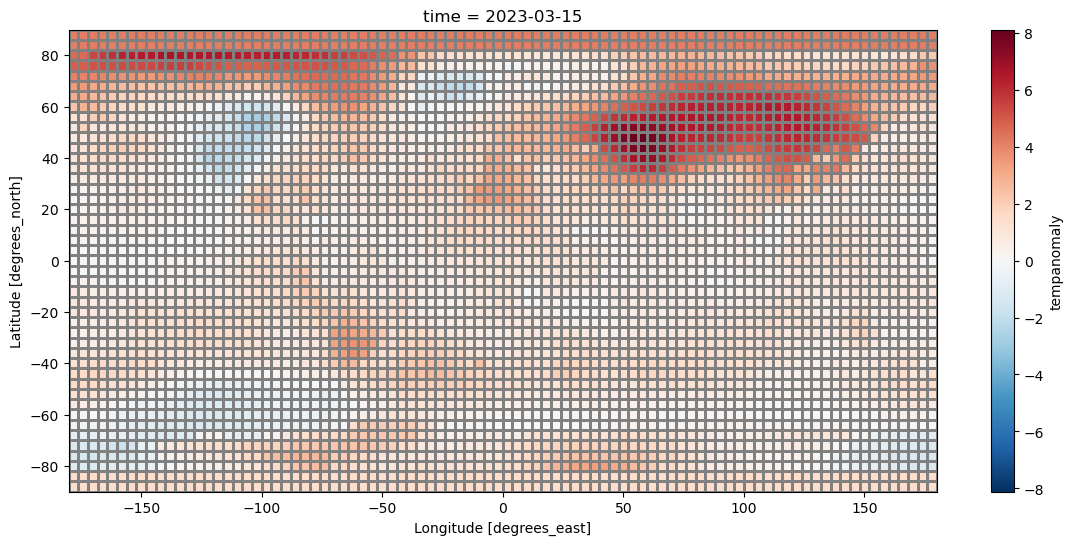

In [25]:
ds_coarse['tempanomaly'].isel(time=-1).plot(figsize=(14, 6), edgecolor='grey');

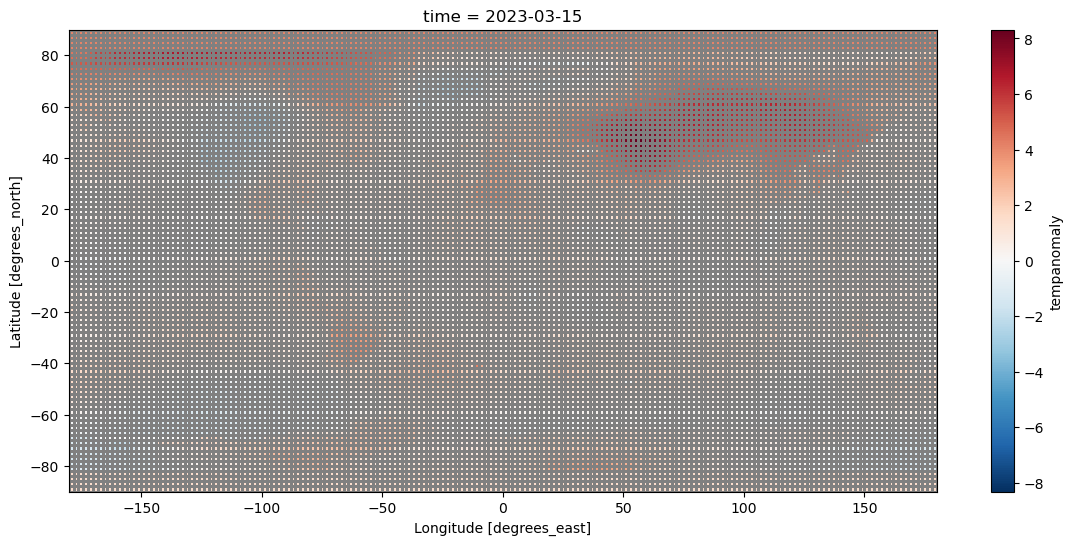

In [26]:
ds['tempanomaly'].isel(time=-1).plot(figsize=(14, 6), edgecolor='grey');

<a id='xr-transform'></a>
## transform

[Return to Start of Notebook](#xr)  

In [27]:
ds.attrs["units"] = "C"
ds.attrs["long_name"] = "Global Temperature Anomalies"
ds.attrs

{'title': 'GISTEMP Surface Temperature Analysis',
 'institution': 'NASA Goddard Institute for Space Studies',
 'source': 'http://data.giss.nasa.gov/gistemp/',
 'Conventions': 'CF-1.6',
 'history': 'Created 2023-04-11 11:10:31 by SBBX_to_nc 2.0 - ILAND=1200, IOCEAN=NCDC/ER5, Base: 1951-1980',
 'units': 'C',
 'long_name': 'Global Temperature Anomalies'}

<a id='xr-select'></a>
## select

[Return to Start of Notebook](#xr)  

### .sel
- returns DataArray

#### single year

In [28]:
sel_year = 2020
sel = da.sel({'time':str(sel_year)})
print(type(sel))

<class 'xarray.core.dataarray.DataArray'>


In [29]:
sel.coords

Coordinates:
  * lat      (lat) float32 -89.0 -87.0 -85.0 -83.0 -81.0 ... 83.0 85.0 87.0 89.0
  * lon      (lon) float32 -179.0 -177.0 -175.0 -173.0 ... 175.0 177.0 179.0
  * time     (time) datetime64[ns] 2020-01-15 2020-02-15 ... 2020-12-15

#### slice date range

In [30]:
sel_year1 = str(2000)
sel_year2 = str(2020)
sel = da.sel(time=slice(sel_year1, sel_year2))
sel.coords

Coordinates:
  * lat      (lat) float32 -89.0 -87.0 -85.0 -83.0 -81.0 ... 83.0 85.0 87.0 89.0
  * lon      (lon) float32 -179.0 -177.0 -175.0 -173.0 ... 175.0 177.0 179.0
  * time     (time) datetime64[ns] 2000-01-15 2000-02-15 ... 2020-12-15

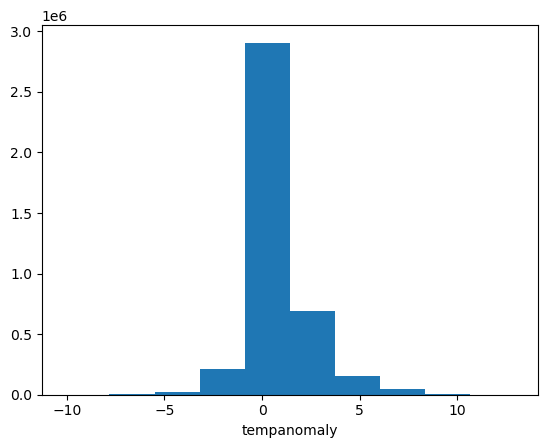

In [31]:
sel.plot();

#### .values
- returns ndarray

In [32]:
val = sel.values
print(type(val))

<class 'numpy.ndarray'>


#### location

In [33]:
sel_lat = -89.0
sel_lon =  -179.0
sel = da.sel(lat=str(sel_lat), lon = str(sel_lon))
val = sel.values
sel.coords

Coordinates:
    lat      float32 -89.0
    lon      float32 -179.0
  * time     (time) datetime64[ns] 1880-01-15 1880-02-15 ... 2023-03-15

### .isel

In [34]:
sel_int = -2
sel = da.isel(time = sel_int)
sel.coords

Coordinates:
  * lat      (lat) float32 -89.0 -87.0 -85.0 -83.0 -81.0 ... 83.0 85.0 87.0 89.0
  * lon      (lon) float32 -179.0 -177.0 -175.0 -173.0 ... 175.0 177.0 179.0
    time     datetime64[ns] 2023-02-15

### brackets

In [35]:
sel = da[sel_int,:,:]
sel.coords

Coordinates:
  * lat      (lat) float32 -89.0 -87.0 -85.0 -83.0 -81.0 ... 83.0 85.0 87.0 89.0
  * lon      (lon) float32 -179.0 -177.0 -175.0 -173.0 ... 175.0 177.0 179.0
    time     datetime64[ns] 2023-02-15

### .loc

In [36]:
sel = da.loc[str(sel_year)]
sel.coords

Coordinates:
  * lat      (lat) float32 -89.0 -87.0 -85.0 -83.0 -81.0 ... 83.0 85.0 87.0 89.0
  * lon      (lon) float32 -179.0 -177.0 -175.0 -173.0 ... 175.0 177.0 179.0
  * time     (time) datetime64[ns] 2020-01-15 2020-02-15 ... 2020-12-15

### single value

In [37]:
val = da.sel(time = str(sel_year),
             lat = str(sel_lat),
             lon = str(sel_lon)).values
val

array([-1.23      ,  1.14      , -0.09      ,  2.        ,  1.6899999 ,
        1.6899999 ,  0.32      , -0.48999998,  0.14      , -0.84999996,
        1.1       ,  0.34      ], dtype=float32)

<a id='xr-export'></a>
## export

[Return to Start of Notebook](#xr)  

In [38]:
save_file_name = 'global_multi-dimensional.nc'
save_path = os.path.join(transformed_data_dir,  save_file_name)

'/Users/rkforest/gta/data/transformed-data/global_multi-dimensional.nc'

In [39]:
ds_coarse.to_netcdf(save_path) 